## ISRG historical data

### ISRG historical data

In [1]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol and the period
isrg = ['ISRG']
start_date = "2020-03-01"
end_date = "2024-06-30"

# Fetch historical data from Yahoo Finance
isrg_data = yf.download(isrg, start=start_date, end=end_date)[['Close', 'Volume']]

# Convert the fetched data into a DataFrame
isrg_data = pd.DataFrame(isrg_data)
isrg_data.reset_index(inplace=True)

# Calculate the change ratio
isrg_data['ChangeRatio'] = isrg_data['Close'].diff() / isrg_data['Close'].shift(1) * 100
isrg_data['ChangeRatio'].fillna(0, inplace=True)

# Date 열의 값은 date 값만
isrg_data['Date'] = isrg_data['Date'].dt.strftime('%Y-%m-%d')
isrg_data['Date'] = pd.to_datetime(isrg_data['Date']) # datetime type으로 변환

# ChangeRatio열의 값은 소숫점 두자리까지만
isrg_data['ChangeRatio'] = isrg_data['ChangeRatio'].round(2)

# Display the DataFrame
print(isrg_data.head())


[*********************100%%**********************]  1 of 1 completed

        Date   Close  Volume  ChangeRatio
0 2020-03-02  4850.0   62118         0.00
1 2020-03-03  4750.0   46655        -2.06
2 2020-03-04  4790.0   27502         0.84
3 2020-03-05  4900.0   27374         2.30
4 2020-03-06  4800.0   19748        -2.04



/tmp/ipykernel_7915/1718252550.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  curexo_data['ChangeRatio'].fillna(0, inplace=True)


In [34]:
print(isrg_data['Date'].dtype)
print(isrg_data['Date'].head())

datetime64[ns]
0   2020-03-02
1   2020-03-03
2   2020-03-04
3   2020-03-05
4   2020-03-06
Name: Date, dtype: datetime64[ns]


In [35]:
isrg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1064 non-null   datetime64[ns]
 1   Close        1064 non-null   float64       
 2   Volume       1064 non-null   int64         
 3   ChangeRatio  1064 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 33.4 KB


### 종가선+20일이평선+거래량 차트

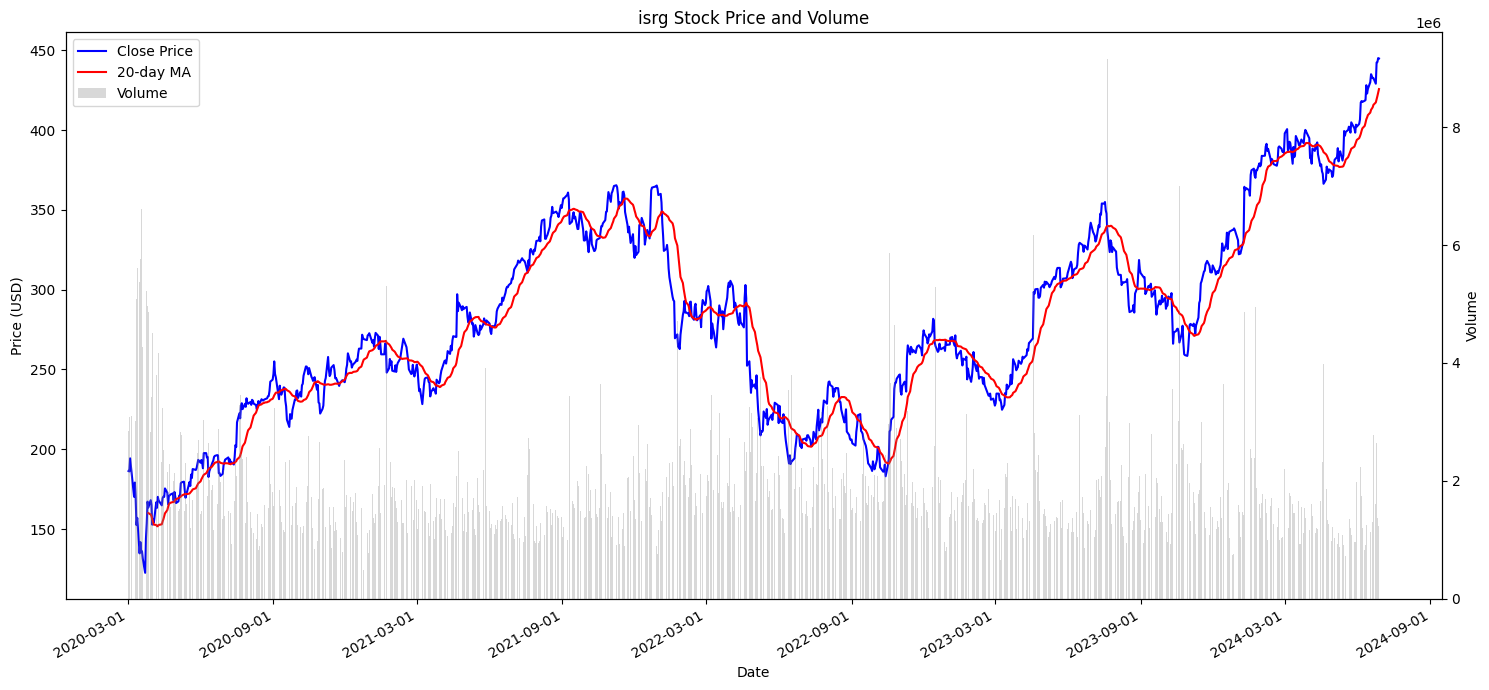

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

isrg_data = pd.read_csv("../sql/data/project_v1/isrg_historical_data_20200301-0630.csv")
isrg_data['Date'] = pd.to_datetime(isrg_data['Date'], format='%Y-%m-%d')  # 적절한 형식을 지정

# 20일 이동평균선 계산
isrg_data['MA20'] = isrg_data['Close'].rolling(window=20).mean()

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(15,7))

# 종가선과 20일 이동평균선 그리기
ax1.plot(isrg_data['Date'], isrg_data['Close'], label='Close Price', color='blue')
ax1.plot(isrg_data['Date'], isrg_data['MA20'], label='20-day MA', color='red')

# 첫 번째 y축 설정 (가격)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.tick_params(axis='y')

# 두 번째 y축 생성 (거래량)
ax2 = ax1.twinx()
ax2.bar(isrg_data['Date'], isrg_data['Volume'], label='Volume', alpha=0.3, color='gray')
ax2.set_ylabel('Volume')
ax2.tick_params(axis='y')

# x축 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

# 범례 설정
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 그래프 제목 설정
plt.title('isrg Stock Price and Volume')

# x축 레이블 회전
plt.gcf().autofmt_xdate()

# 그래프 표시
plt.tight_layout()
plt.show()

### 특정 구간 산정

#### 상위 5% 기울기 파악

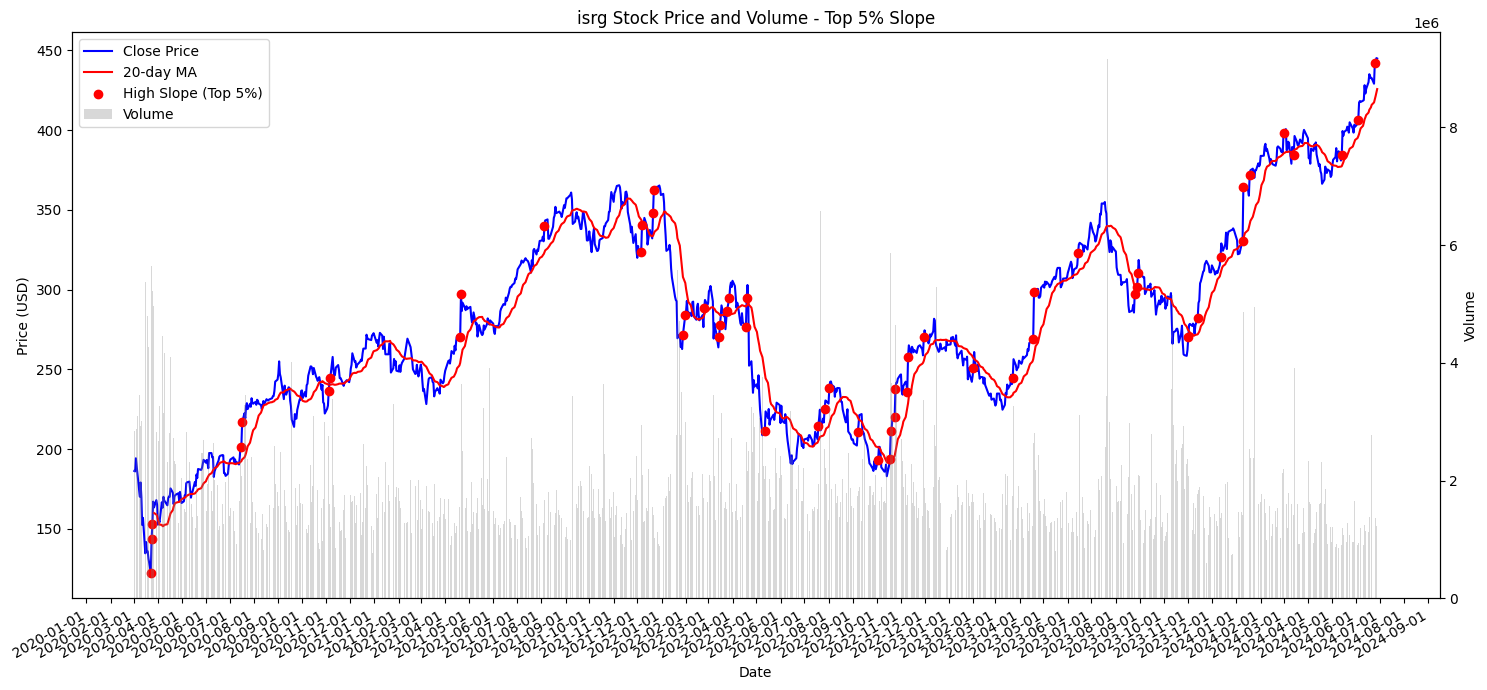

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Load the data
file_path = "../sql/data/project_v1/isrg_historical_data_20200301-0630.csv"
isrg_data = pd.read_csv(file_path)

# Step 2: Convert 'Date' column to datetime format
isrg_data['Date'] = pd.to_datetime(isrg_data['Date'])

# Step 3: Calculate the 20-day moving average
isrg_data['MA20'] = isrg_data['Close'].rolling(window=20).mean()

# Step 4: Calculate the slope of the closing price
isrg_data['Slope'] = np.gradient(isrg_data['Close'])

# Step 5: Determine the threshold for the top 5% slopes
slope_threshold_5 = np.percentile(isrg_data['Slope'].dropna(), 95)

# Step 6: Identify points where the slope exceeds the threshold for top 5%
isrg_data['HighSlope5'] = isrg_data['Slope'] > slope_threshold_5

# Step 7: Plot the closing price, 20-day moving average, and highlight top 5% slope points
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the closing price and 20-day moving average
ax1.plot(isrg_data['Date'], isrg_data['Close'], label='Close Price', color='blue')
ax1.plot(isrg_data['Date'], isrg_data['MA20'], label='20-day MA', color='red')

# Highlight points where the slope is in the top 5%
ax1.scatter(isrg_data.loc[isrg_data['HighSlope5'], 'Date'], 
            isrg_data.loc[isrg_data['HighSlope5'], 'Close'], 
            color='red', label='High Slope (Top 5%)', zorder=5)

# First y-axis settings (Price)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.tick_params(axis='y')

# Second y-axis (Volume)
ax2 = ax1.twinx()
ax2.bar(isrg_data['Date'], isrg_data['Volume'], label='Volume', alpha=0.3, color='gray')
ax2.set_ylabel('Volume')
ax2.tick_params(axis='y')

# x-axis date format settings
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Legend settings
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Graph title
plt.title('isrg Stock Price and Volume - Top 5% Slope')

# Rotate x-axis labels
plt.gcf().autofmt_xdate()

# Display the graph
plt.tight_layout()
plt.show()


#### 상위5% 기울기값을 갖는 구간 중, 상위 10% KDE 클러스터 파악

/tmp/ipykernel_31998/3879901037.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_slope_data['Density'] = density


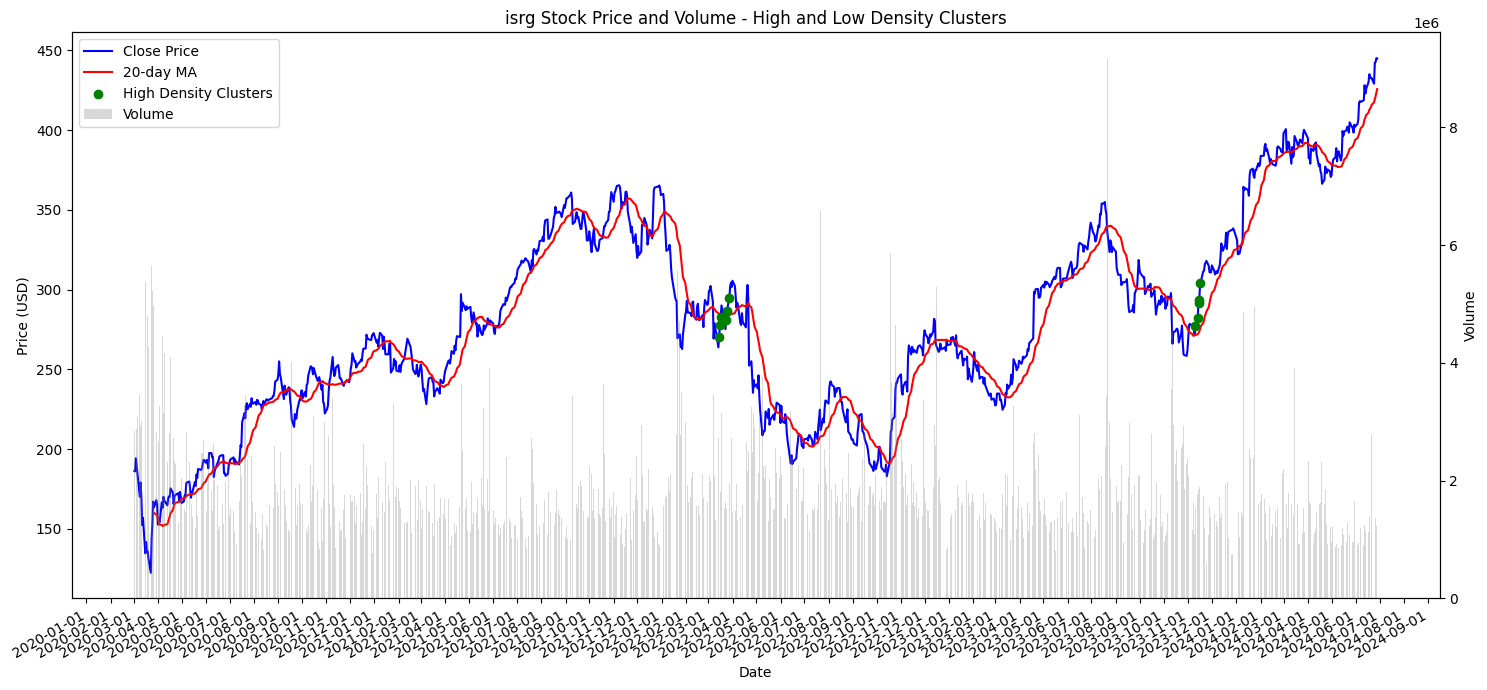

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.neighbors import KernelDensity


# Step 2: Convert 'Date' column to datetime format
isrg_data['Date'] = pd.to_datetime(isrg_data['Date'])

# Step 3: Calculate the 20-day moving average
isrg_data['MA20'] = isrg_data['Close'].rolling(window=20).mean()

# Step 4: Calculate the slope of the closing price
isrg_data['Slope'] = np.gradient(isrg_data['Close'])

# Step 5: Determine the threshold for the top 5% slopes
slope_threshold_5 = np.percentile(isrg_data['Slope'].dropna(), 90)

# Step 6: Identify points where the slope exceeds the threshold for top 5%
isrg_data['HighSlope5'] = isrg_data['Slope'] > slope_threshold_5

# Step 7: Prepare data for Kernel Density Estimation (KDE)
# Convert 'Date' to ordinal numbers for KDE
isrg_data['DateOrdinal'] = isrg_data['Date'].apply(lambda x: x.toordinal())
high_slope_data = isrg_data[isrg_data['HighSlope5']]
X = high_slope_data[['DateOrdinal', 'Slope']].values

# Step 8: Perform Kernel Density Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(X)
log_density = kde.score_samples(X)
density = np.exp(log_density)

# Add density to the dataframe
high_slope_data['Density'] = density

# Step 9: Define a density threshold to identify clusters
density_threshold = np.percentile(density, 90)  # Adjust this value as needed

# Identify high-density clusters
high_density_clusters = high_slope_data[high_slope_data['Density'] > density_threshold]

# Identify low-density clusters
low_density_clusters = high_slope_data[high_slope_data['Density'] <= density_threshold]

# Step 10: Plot the closing price, 20-day moving average, and highlight clusters
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the closing price and 20-day moving average
ax1.plot(isrg_data['Date'], isrg_data['Close'], label='Close Price', color='blue')
ax1.plot(isrg_data['Date'], isrg_data['MA20'], label='20-day MA', color='red')

# 고밀도 군집 하이라이트(상위10%) : 밀도값의 90번째 백분위수(KDE에서 가장 조밀하게 채워진 데이터 포인트 영역을 식별하는 임계값)
ax1.scatter(high_density_clusters['Date'], high_density_clusters['Close'], 
            color='green', label='High Density Clusters', zorder=5)

# 저밀도 군집 하이라이트
# ax1.scatter(low_density_clusters['Date'], low_density_clusters['Close'], 
#             color='orange', label='Low Density Clusters', zorder=5)

# First y-axis settings (Price)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.tick_params(axis='y')

# Second y-axis (Volume)
ax2 = ax1.twinx()
ax2.bar(isrg_data['Date'], isrg_data['Volume'], label='Volume', alpha=0.3, color='gray')
ax2.set_ylabel('Volume')
ax2.tick_params(axis='y')

# x-axis date format settings
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Legend settings
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Graph title
plt.title('isrg Stock Price and Volume - High and Low Density Clusters')

# Rotate x-axis labels
plt.gcf().autofmt_xdate()

# Display the graph
plt.tight_layout()
plt.show()


#### 10일-20일 이평선 골든크로스 파악

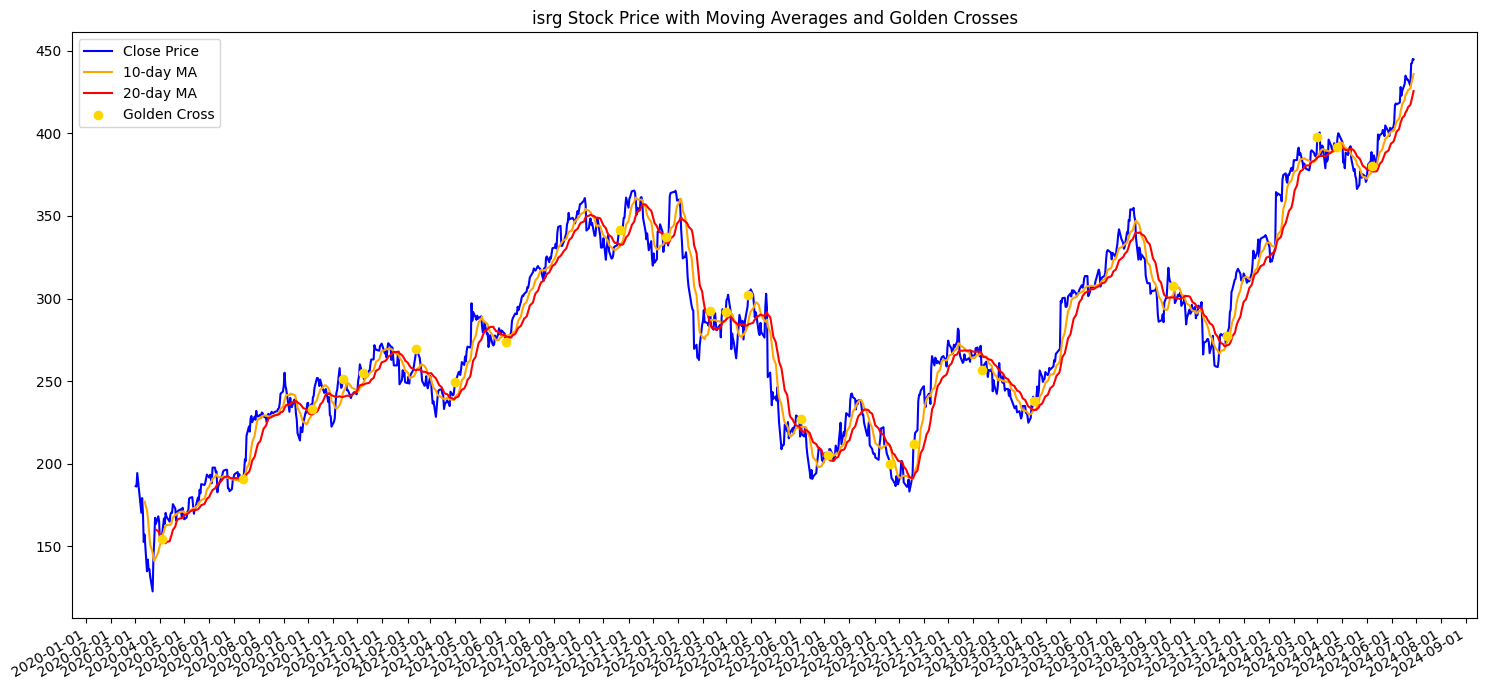

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Date' column to datetime format
isrg_data['Date'] = pd.to_datetime(isrg_data['Date'])

# Calculate moving averages
isrg_data['10MA'] = isrg_data['Close'].rolling(window=10).mean()
isrg_data['20MA'] = isrg_data['Close'].rolling(window=20).mean()
# isrg_data['60MA'] = isrg_data['Close'].rolling(window=200).mean()

# Identify Golden Crosses (20MA crossing above 60MA)
isrg_data['GoldenCross'] = (isrg_data['10MA'] > isrg_data['20MA']) & (isrg_data['10MA'].shift(1) <= isrg_data['20MA'].shift(1))

# Plot the closing price and moving averages
fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(isrg_data['Date'], isrg_data['Close'], label='Close Price', color='blue')
ax1.plot(isrg_data['Date'], isrg_data['10MA'], label='10-day MA', color='orange')
ax1.plot(isrg_data['Date'], isrg_data['20MA'], label='20-day MA', color='red')
# ax1.plot(isrg_data['Date'], isrg_data['60MA'], label='60-day MA', color='green')

# Highlight Golden Crosses
golden_cross_dates = isrg_data.loc[isrg_data['GoldenCross'], 'Date']
ax1.scatter(golden_cross_dates, isrg_data.loc[isrg_data['GoldenCross'], 'Close'], color='gold', label='Golden Cross', zorder=5)

# x-axis date format settings
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Legend settings
ax1.legend(loc='upper left')

# Graph title
plt.title('isrg Stock Price with Moving Averages and Golden Crosses')

# Rotate x-axis labels
plt.gcf().autofmt_xdate()

# Display the graph
plt.tight_layout()
plt.show()


#### 추출된 3개의 지표 데이터가 5일 이내 기간동안 두 번 이상 겹치는 구간 산정

/tmp/ipykernel_31998/1509928769.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_slope_data['Density'] = density


         Date  HighSlope5  HighDensity  GoldenCross
0  2020-07-13        True        False         True
1  2020-07-16        True        False         True
2  2020-07-17        True        False         True
3  2021-12-17        True        False         True
4  2021-12-21        True        False         True
5  2021-12-22        True        False         True
6  2022-02-24        True        False         True
7  2022-03-01        True        False         True
8  2022-03-15        True         True        False
9  2022-03-16        True         True        False
10 2022-03-25        True         True         True
11 2022-03-28        True         True         True
12 2022-03-29        True         True         True
13 2022-10-18        True         True         True
14 2022-10-19        True         True         True
15 2022-10-20        True         True         True
16 2022-10-24        True         True         True
17 2022-10-25        True         True         True
18 2023-11-1

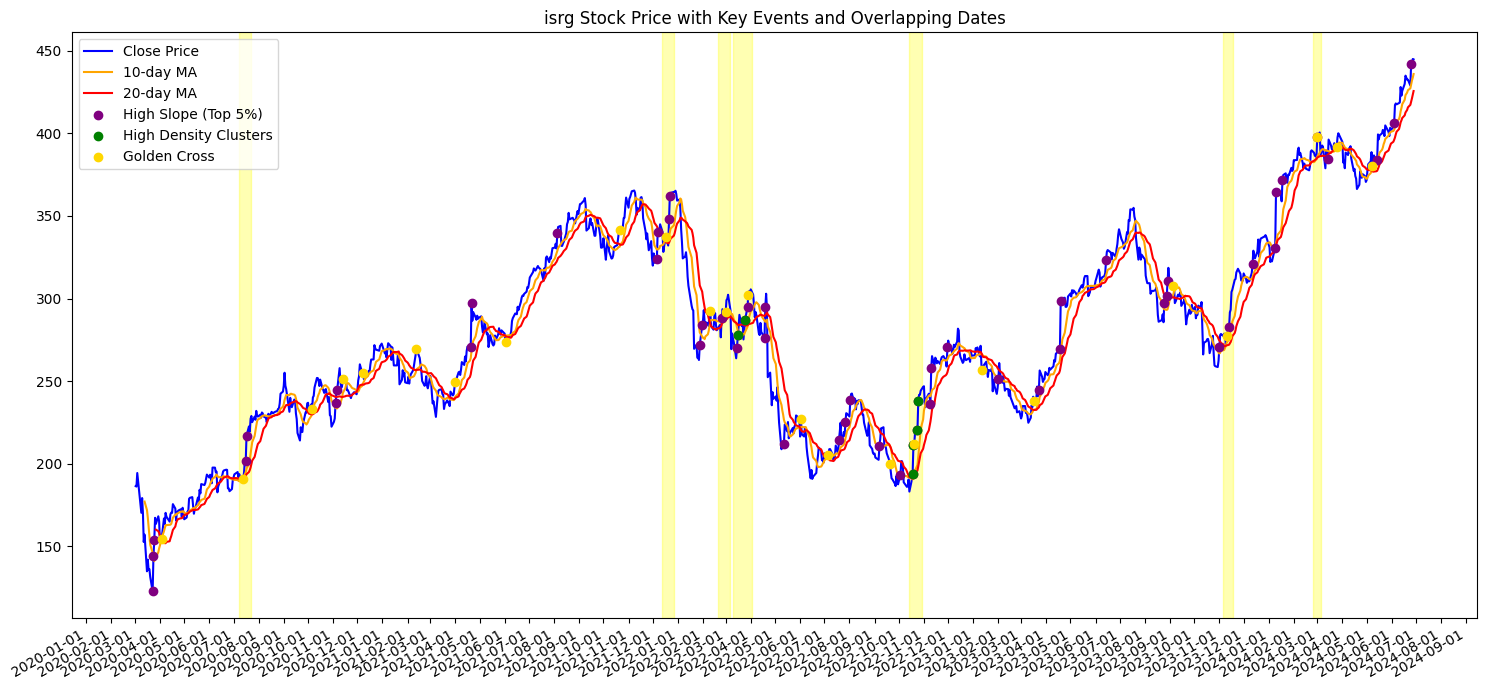

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.neighbors import KernelDensity

# 'Date' 열을 datetime 형식으로 변환
isrg_data['Date'] = pd.to_datetime(isrg_data['Date'])

# 10일 및 20일 이동 평균 계산
isrg_data['MA10'] = isrg_data['Close'].rolling(window=10).mean()
isrg_data['MA20'] = isrg_data['Close'].rolling(window=20).mean()

# 종가의 기울기 계산
isrg_data['Slope'] = np.gradient(isrg_data['Close'])

# 상위 5% 기울기의 임계값 결정
slope_threshold_5 = np.percentile(isrg_data['Slope'].dropna(), 95)

# 기울기가 상위 5% 임계값을 초과하는 지점 식별
isrg_data['HighSlope5'] = isrg_data['Slope'] > slope_threshold_5

# 커널 밀도 추정을 위한 데이터 준비
# 'Date'를 KDE를 위한 ordinal 숫자로 변환
isrg_data['DateOrdinal'] = isrg_data['Date'].apply(lambda x: x.toordinal())
high_slope_data = isrg_data[isrg_data['HighSlope5']]
X = high_slope_data[['DateOrdinal', 'Slope']].values

# 커널 밀도 추정 수행
kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(X)
log_density = kde.score_samples(X)
density = np.exp(log_density)

# 데이터프레임에 밀도 추가
high_slope_data['Density'] = density

# 클러스터 식별을 위한 밀도 임계값 정의
density_threshold = np.percentile(density, 90)  # 필요한 경우 이 값을 조정

# 고밀도 클러스터 식별
high_density_clusters = high_slope_data[high_slope_data['Density'] > density_threshold]

# 골든 크로스 식별 (10일 MA가 20일 MA를 넘는 경우)
isrg_data['GoldenCross'] = (isrg_data['MA10'] > isrg_data['MA20']) & (isrg_data['MA10'].shift(1) <= isrg_data['MA20'].shift(1))

# 모든 주요 날짜를 하나의 데이터프레임으로 결합
key_dates = pd.DataFrame({
    'Date': pd.concat([
        high_slope_data['Date'],
        high_density_clusters['Date'],
        isrg_data.loc[isrg_data['GoldenCross'], 'Date']
    ]).unique()
}).sort_values(by='Date').reset_index(drop=True)

# 5일 이내 겹치는 구간을 확인하는 함수 정의
def check_overlaps(dates_df, original_df, column_name):
    dates_df[column_name] = dates_df['Date'].apply(
        lambda x: any((original_df['Date'] >= x - pd.Timedelta(days=5)) & (original_df['Date'] <= x + pd.Timedelta(days=5)))
    )
    return dates_df

# 각 범주에 대해 5일 이내 겹치는 구간 확인
key_dates = check_overlaps(key_dates, high_slope_data, 'HighSlope5')
key_dates = check_overlaps(key_dates, high_density_clusters, 'HighDensity')
key_dates = check_overlaps(key_dates, isrg_data.loc[isrg_data['GoldenCross']], 'GoldenCross')

# 최소 두 개 이상의 조건이 겹치는 행 필터링
overlapping_dates = key_dates[key_dates[['HighSlope5', 'HighDensity', 'GoldenCross']].sum(axis=1) > 1]
overlapping_dates.reset_index(drop=True, inplace=True)
# 겹치는 날짜 표시
print(overlapping_dates)

# 겹치는 구간 병합 함수 정의
def merge_overlapping_dates(dates, window_days=5):
    if dates.empty:
        return []
    
    # 날짜를 시작과 끝 구간으로 변환
    intervals = [(date - pd.Timedelta(days=window_days), date + pd.Timedelta(days=window_days)) for date in dates]
    intervals.sort()
    
    merged = [intervals[0]]
    for current in intervals:
        last = merged[-1]
        if current[0] <= last[1]:
            merged[-1] = (last[0], max(last[1], current[1]))
        else:
            merged.append(current)
    return merged

# 겹치는 날짜 병합
merged_overlapping_dates = merge_overlapping_dates(overlapping_dates['Date'])

# 주요 날짜가 강조된 결합 차트 그리기
fig, ax1 = plt.subplots(figsize=(15, 7))

# 종가 그리기
ax1.plot(isrg_data['Date'], isrg_data['Close'], label='Close Price', color='blue')

# 10일 및 20일 이동 평균 그리기
ax1.plot(isrg_data['Date'], isrg_data['MA10'], label='10-day MA', color='orange')
ax1.plot(isrg_data['Date'], isrg_data['MA20'], label='20-day MA', color='red')

# 상위 5% 기울기 지점 강조
ax1.scatter(high_slope_data['Date'], high_slope_data['Close'], color='purple', label='High Slope (Top 5%)', zorder=5)

# 고밀도 클러스터 강조
ax1.scatter(high_density_clusters['Date'], high_density_clusters['Close'], 
            color='green', label='High Density Clusters', zorder=5)

# 골든 크로스 강조
golden_cross_dates = isrg_data.loc[isrg_data['GoldenCross'], 'Date']
ax1.scatter(golden_cross_dates, isrg_data.loc[isrg_data['GoldenCross'], 'Close'], 
            color='gold', label='Golden Cross', zorder=5)

# 겹치는 구간을 파스텔 색상으로 강조
for start_date, end_date in merged_overlapping_dates:
    ax1.axvspan(start_date, end_date, color='yellow', alpha=0.3)

# x축 날짜 형식 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# 범례 설정
ax1.legend(loc='upper left')

# 그래프 제목 설정
plt.title('isrg Stock Price with Key Events and Overlapping Dates')

# x축 레이블 회전
plt.gcf().autofmt_xdate()

# 그래프 표시
plt.tight_layout()
plt.show()

overlapping_dates.to_csv("../sql/data/project_v1/isrg_overlapping_dates.csv", index=False)


#### 추출된 특정 구간 병합

In [7]:
import pandas as pd
import numpy as np

# 겹치는 데이터 로드
isrg_overlapping_data = pd.read_csv("../sql/data/project_v1/isrg_overlapping_dates.csv")
isrg_overlapping_data['Date'] = pd.to_datetime(isrg_overlapping_data['Date'])

# 주말을 제외한 영업일을 더하는 함수
def add_business_days(start_date, num_days):
    current_date = start_date
    while num_days > 0:
        current_date += pd.Timedelta(days=1)
        if current_date.weekday() < 5:  # 월요일부터 금요일은 영업일
            num_days -= 1
    return current_date

# 연도와 월별로 그룹화
isrg_overlapping_data['YearMonth'] = isrg_overlapping_data['Date'].dt.to_period('M')
grouped = isrg_overlapping_data.groupby('YearMonth')

# 새로운 데이터 테이블 생성
signifi_prd_data = []

for name, group in grouped:
    start_date = add_business_days(group['Date'].min() - pd.Timedelta(days=1), -2)  # 가장 빠른 날짜로부터 2 영업일 전
    end_date = add_business_days(group['Date'].max(), 2)  # 가장 늦은 날짜로부터 2 영업일 후
    period = f"{start_date.date()} to {end_date.date()}"
    rising_period = ', '.join(group['Date'].dt.date.astype(str).tolist())
    date_ls = pd.date_range(start=start_date, end=end_date).to_list()
    date_ls = [date.date() for date in date_ls]  # 시간 부분 제외
    signifi_prd_data.append({'Period': period, 'Rising Period': rising_period, 'Start Date': start_date, 'End Date': end_date, 'date_ls': date_ls})

# DataFrame으로 변환
signifi_prd_df = pd.DataFrame(signifi_prd_data)

# 인접한 행 결합
combined_data = []
current_period = None

for i, row in signifi_prd_df.iterrows():
    if current_period is None:
        current_period = row
    else:
        if (row['Start Date'] - current_period['End Date']).days <= 18:
            # 기간 병합
            current_period['End Date'] = max(current_period['End Date'], row['End Date'])
            current_period['Rising Period'] += ', ' + row['Rising Period']
            current_period['date_ls'] += row['date_ls']
            current_period['Period'] = f"{current_period['Start Date'].date()} to {current_period['End Date'].date()}"
        else:
            combined_data.append(current_period)
            current_period = row

if current_period is not None:
    combined_data.append(current_period)

# 최종 DataFrame 생성
final_data_df = pd.DataFrame(combined_data).drop(columns=['Start Date', 'End Date'])
print(final_data_df)

final_data_df.to_csv("../sql/data/project_v1/isrg_signifi_prd_data.csv", index=False)


                     Period  \
0  2020-07-12 to 2020-07-21   
1  2021-12-16 to 2021-12-24   
2  2022-02-23 to 2022-03-31   
4  2022-10-17 to 2022-10-27   
5  2023-11-09 to 2023-11-15   
6  2024-02-29 to 2024-03-05   

                                       Rising Period  \
0                 2020-07-13, 2020-07-16, 2020-07-17   
1                 2021-12-17, 2021-12-21, 2021-12-22   
2  2022-02-24, 2022-03-01, 2022-03-15, 2022-03-16...   
4  2022-10-18, 2022-10-19, 2022-10-20, 2022-10-24...   
5                             2023-11-10, 2023-11-13   
6                                         2024-03-01   

                                             date_ls  
0  [2020-07-12, 2020-07-13, 2020-07-14, 2020-07-1...  
1  [2021-12-16, 2021-12-17, 2021-12-18, 2021-12-1...  
2  [2022-02-23, 2022-02-24, 2022-02-25, 2022-02-2...  
4  [2022-10-17, 2022-10-18, 2022-10-19, 2022-10-2...  
5  [2023-11-09, 2023-11-10, 2023-11-11, 2023-11-1...  
6  [2024-02-29, 2024-03-01, 2024-03-02, 2024-03-0...  


#### 기간 변화에 따른 거래량 KDE(커널밀도추정치) 차트를 통한 거래량 상위 구간 파악하기

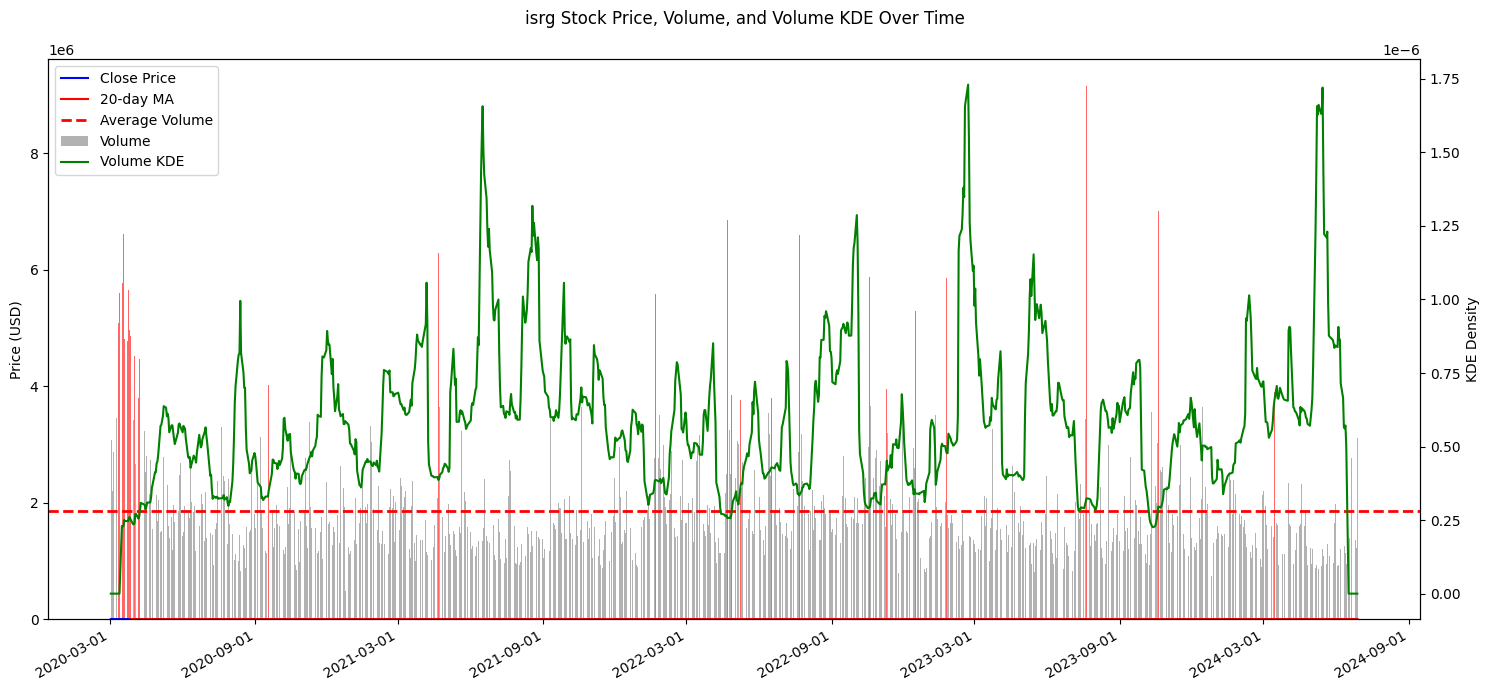

In [8]:
from scipy.stats import gaussian_kde

# Convert the 'Date' column to datetime format
isrg_data['Date'] = pd.to_datetime(isrg_data['Date'])

# Calculate the 20-day moving average line
isrg_data['MA20'] = isrg_data['Close'].rolling(window=20).mean()

# Calculate the average volume
average_volume = isrg_data['Volume'].mean()

# Define the threshold for high volumes (200% above the average)
high_volume_threshold = 2 * average_volume

# Define a function to calculate KDE for a given window
def calculate_kde(data, bw=0.5):
    if len(data) < 2:  # KDE requires at least two data points
        return np.zeros_like(data)
    kde = gaussian_kde(data, bw_method=bw)
    return kde(data)

# Calculate the KDE for each rolling window of trading volumes
window_size = 20  # Example window size
rolling_kde_values = []

for i in range(len(isrg_data)):
    if i < window_size // 2 or i > len(isrg_data) - window_size // 2:
        rolling_kde_values.append(0)
    else:
        window_data = isrg_data['Volume'].iloc[i - window_size // 2:i + window_size // 2]
        kde_value = calculate_kde(window_data).mean()  # Average KDE value for the window
        rolling_kde_values.append(kde_value)

isrg_data['Volume_KDE'] = rolling_kde_values

# Create a figure for the price, volume, and KDE plot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot closing price and 20-day moving average on the first subplot
ax1.plot(isrg_data['Date'], isrg_data['Close'], label='Close Price', color='blue')
ax1.plot(isrg_data['Date'], isrg_data['MA20'], label='20-day MA', color='red')
ax1.set_ylabel('Price (USD)')
ax1.legend(loc='upper left')

# Plot volume bars on the first subplot
colors = ['red' if vol > high_volume_threshold else 'gray' for vol in isrg_data['Volume']]
ax1.bar(isrg_data['Date'], isrg_data['Volume'], label='Volume', alpha=0.6, color=colors)
ax1.axhline(average_volume, color='red', linestyle='--', linewidth=2, label='Average Volume')

# Create second y-axis for KDE
ax2 = ax1.twinx()
ax2.plot(isrg_data['Date'], isrg_data['Volume_KDE'], color='green', label='Volume KDE')
ax2.set_ylabel('KDE Density')
ax2.tick_params(axis='y')

# Set x-axis date format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

# Set legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set graph title
fig.suptitle('isrg Stock Price, Volume, and Volume KDE Over Time')

# Rotate x-axis labels
plt.gcf().autofmt_xdate()

# Display graph
plt.tight_layout()
plt.show()


#### 거래량 KDE 값에서, 200% 이상의 거래량과 해당 구간에서 나타나는 수치가 평탄화되는 구간 특정하기

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# 'Date' 열을 datetime 형식으로 변환
isrg_data['Date'] = pd.to_datetime(isrg_data['Date'])

# 20일 이동 평균선 계산
isrg_data['MA20'] = isrg_data['Close'].rolling(window=20).mean()

# 평균 거래량 계산
average_volume = isrg_data['Volume'].mean()

# 높은 거래량의 기준을 평균의 200%로 설정
high_volume_threshold = 2 * average_volume

# 주어진 윈도우에 대해 KDE를 계산하는 함수 정의
def calculate_kde(data, bw=0.5):
    if len(data) < 2:  # KDE는 최소 두 개의 데이터 포인트가 필요
        return np.zeros_like(data)
    kde = gaussian_kde(data, bw_method=bw)
    return kde(data)

# 각 이동 윈도우의 거래량에 대한 KDE 계산
window_size = 20  # 예시 윈도우 크기
rolling_kde_values = []

for i in range(len(isrg_data)):
    if i < window_size // 2 or i > len(isrg_data) - window_size // 2:
        rolling_kde_values.append(0)
    else:
        window_data = isrg_data['Volume'].iloc[i - window_size // 2:i + window_size // 2]
        kde_value = calculate_kde(window_data).mean()  # 윈도우의 평균 KDE 값
        rolling_kde_values.append(kde_value)

isrg_data['Volume_KDE'] = rolling_kde_values

# 거래량이 평균의 200%를 초과하는 날짜 식별
high_volume_dates = isrg_data[isrg_data['Volume'] > high_volume_threshold]['Date']

# 높은 거래량 구간에서 KDE 값이 낮고 평평한 부분을 찾기
low_kde_threshold = 0.1  # 예시 기준값, 필요에 따라 조정 가능
flat_sections = []

for date in high_volume_dates:
    idx = isrg_data[isrg_data['Date'] == date].index[0]
    start_idx = max(0, idx - window_size // 2)
    end_idx = min(len(isrg_data) - 1, idx + window_size // 2)
    
    section_kde_values = isrg_data['Volume_KDE'].iloc[start_idx:end_idx + 1]
    if section_kde_values.max() < low_kde_threshold:
        flat_sections.append((start_idx, end_idx))

# 구간에 대한 데이터프레임 생성
flat_section_data = pd.DataFrame()
for start_idx, end_idx in flat_sections:
    section_df = isrg_data.iloc[start_idx:end_idx + 1][['Date', 'Volume', 'Close', 'Volume_KDE']]
    flat_section_data = pd.concat([flat_section_data, section_df])

flat_section_data = flat_section_data.drop_duplicates().reset_index(drop=True)

# KDE 값을 정규화
min_kde = flat_section_data['Volume_KDE'].min()
max_kde = flat_section_data['Volume_KDE'].max()
flat_section_data['Normalized_Volume_KDE'] = (flat_section_data['Volume_KDE'] - min_kde) / (max_kde - min_kde)

# 데이터프레임 출력
print(flat_section_data)


          Date   Volume       Close    Volume_KDE  Normalized_Volume_KDE
0   2020-03-02  2842500  186.356674  0.000000e+00               0.000000
1   2020-03-03  3081600  186.089996  0.000000e+00               0.000000
2   2020-03-04  2202000  194.300003  0.000000e+00               0.000000
3   2020-03-05  2871600  189.456665  0.000000e+00               0.000000
4   2020-03-06  3102300  185.046661  0.000000e+00               0.000000
..         ...      ...         ...           ...                    ...
462 2024-04-29   983200  374.140015  5.708606e-07               0.603194
463 2024-04-30  1213200  370.619995  5.995871e-07               0.633548
464 2024-05-01   952200  371.700012  6.248084e-07               0.660198
465 2024-05-02  1208600  377.649994  6.637561e-07               0.701351
466 2024-05-03  1028800  381.359985  7.682719e-07               0.811787

[467 rows x 5 columns]


In [9]:
flat_section_data.to_csv("../sql/data/project_v1/isrg_kde_section_data.csv", encoding="utf-8", index=False)

### 데이터베이스 연결 - ISRG 정보 병합

#### stock_info isrg 자료 불러오기_query

In [10]:
import mysql.connector
import pandas as pd

# MySQL 데이터베이스 연결 설정
conn = mysql.connector.connect(
    host="database-1.cvqcay0g4c1o.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="jook",
    password="********",
    database="antking"
)

# # SQL 쿼리 작성
# query = """
# 			 SELECT a.id, a.search_platform, a.search_keyword, a.pub_date, a.title,
# 			 a.content, a.link, k.keyword_set, se.sentiment_from_ctext,
# 			 se.sentiment_from_keyword, se.match_status, st.closing_price,
# 			 st.volume, st.daily_change_rate
#        FROM article a, sentiment se, keyword k, stock_info st
#        WHERE a.id = se.article_id
#              AND a.id = k.article_id
#              AND a.search_keyword = st.ticker
#              AND a.pub_date = st.date;
#        """

# # 데이터 가져오기
# df = pd.read_sql(query, con=conn)


# final_data_df의 date_ls 칼럼에서 date 값 추출
date_ls = final_data_df['date_ls'].explode().dropna().unique().tolist()

# Convert date list to a string format for SQL query
date_ls_str = ', '.join(f"'{str(date)}'" for date in date_ls)

# query 정의
query = f"""
SELECT 
    date, 
    closing_price, 
    volume, 
    daily_change_rate
FROM 
    stock_info
WHERE 
    ticker = 'ISRG'
    AND date IN ({date_ls_str})
"""

# 데이터 가져오기
df = pd.read_sql(query, con=conn)

print(df)


          date  closing_price     volume  daily_change_rate
0   2020-07-13        190.430  1550400.0              -0.80
1   2020-07-14        195.113  1653600.0               2.46
2   2020-07-15        202.600  2370900.0               3.84
3   2020-07-16        201.417  2088300.0              -0.58
4   2020-07-17        216.913  4995000.0               7.69
5   2020-07-20        222.513  3291600.0               2.58
6   2020-07-21        219.383  3455100.0              -1.41
7   2021-12-16        334.530  2004100.0               0.87
8   2021-12-17        337.400  2623000.0               0.86
9   2021-12-20        332.110  1560400.0              -1.57
10  2021-12-21        348.090  1699200.0               4.81
11  2021-12-22        362.210  1410400.0               4.06
12  2021-12-23        363.940  1022500.0               0.48
13  2022-02-23        276.500  1706000.0              -2.64
14  2022-02-24        288.380  2733700.0               4.30
15  2022-02-25        293.510  1454800.0

/tmp/ipykernel_31998/1075302716.py:51: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=conn)


In [8]:
conn.close()

#### 'sig_score' 열 추가 후, sig_score 입력

In [11]:
df['date'] = pd.to_datetime(df['date'])

# final_data_df에 'sig_score' 열 추가 및 계산 함수 정의
def calculate_sig_score(date_ls, df):
    matching_rates = df[df['date'].isin(date_ls)]['daily_change_rate']
    if len(matching_rates) > 0:
        return matching_rates.sum() / len(matching_rates)
    else:
        return 0

# 'sig_score' 열을 final_data_df에 추가
final_data_df['sig_score'] = final_data_df['date_ls'].apply(lambda x: calculate_sig_score(pd.to_datetime(x), df))

# 결과 출력
print(final_data_df)

# db 연결 종료
conn.close()

# final_data_df 칼럼 정리 및 파일 내보내기
final_data_df[['Period', 'date_ls', 'sig_score']].to_excel("../sql/data/project_v1/isrg_final_data_sig_score.xlsx", engine='xlsxwriter', index=False)


                     Period  \
0  2020-07-12 to 2020-07-21   
1  2021-12-16 to 2021-12-24   
2  2022-02-23 to 2022-03-31   
4  2022-10-17 to 2022-10-27   
5  2023-11-09 to 2023-11-15   
6  2024-02-29 to 2024-03-05   

                                       Rising Period  \
0                 2020-07-13, 2020-07-16, 2020-07-17   
1                 2021-12-17, 2021-12-21, 2021-12-22   
2  2022-02-24, 2022-03-01, 2022-03-15, 2022-03-16...   
4  2022-10-18, 2022-10-19, 2022-10-20, 2022-10-24...   
5                             2023-11-10, 2023-11-13   
6                                         2024-03-01   

                                             date_ls  sig_score  
0  [2020-07-12, 2020-07-13, 2020-07-14, 2020-07-1...   1.968571  
1  [2021-12-16, 2021-12-17, 2021-12-18, 2021-12-1...   1.585000  
2  [2022-02-23, 2022-02-24, 2022-02-25, 2022-02-2...   0.264444  
4  [2022-10-17, 2022-10-18, 2022-10-19, 2022-10-2...   3.180000  
5  [2023-11-09, 2023-11-10, 2023-11-11, 2023-11-1...   1.09

#### 상위 3개 특정 구간 표시

                     Period                                            date_ls
4  2022-10-17 to 2022-10-27  [2022-10-17, 2022-10-18, 2022-10-19, 2022-10-2...
0  2020-07-12 to 2020-07-21  [2020-07-12, 2020-07-13, 2020-07-14, 2020-07-1...
1  2021-12-16 to 2021-12-24  [2021-12-16, 2021-12-17, 2021-12-18, 2021-12-1...


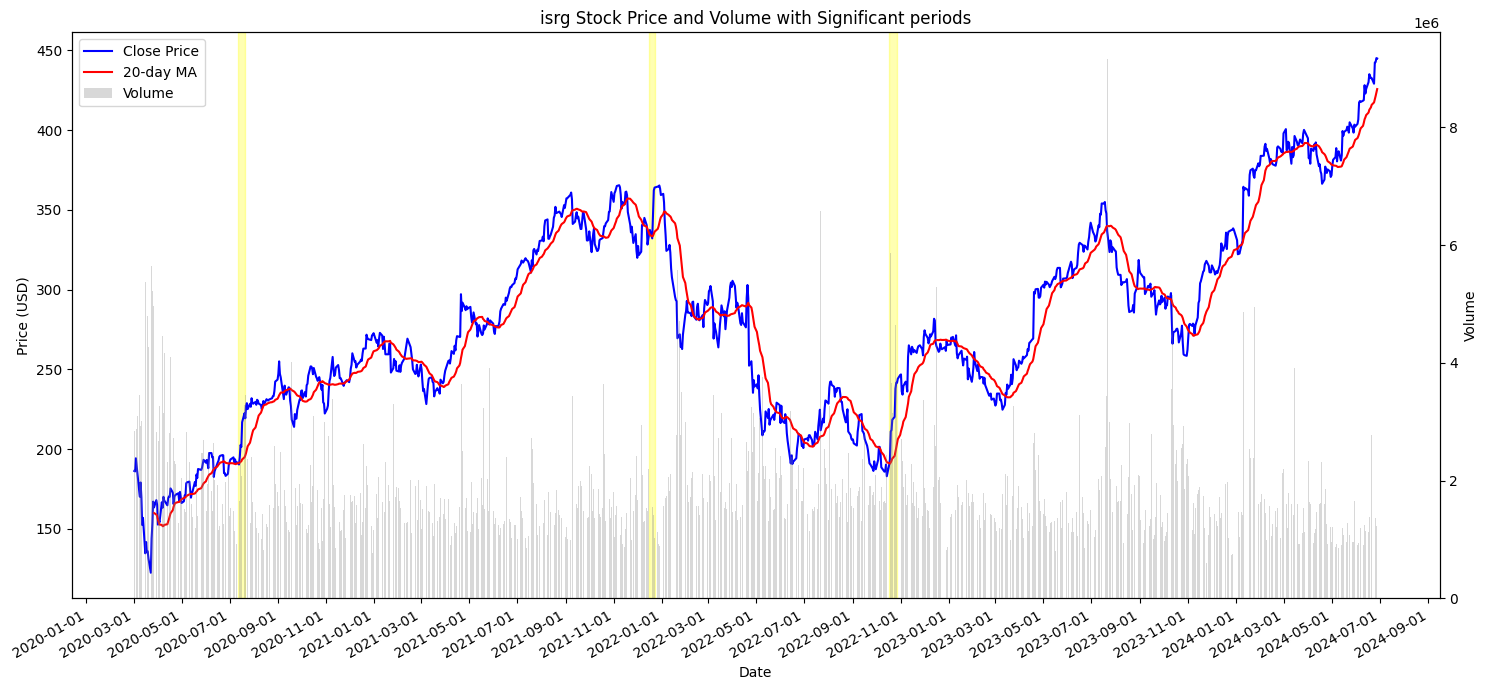

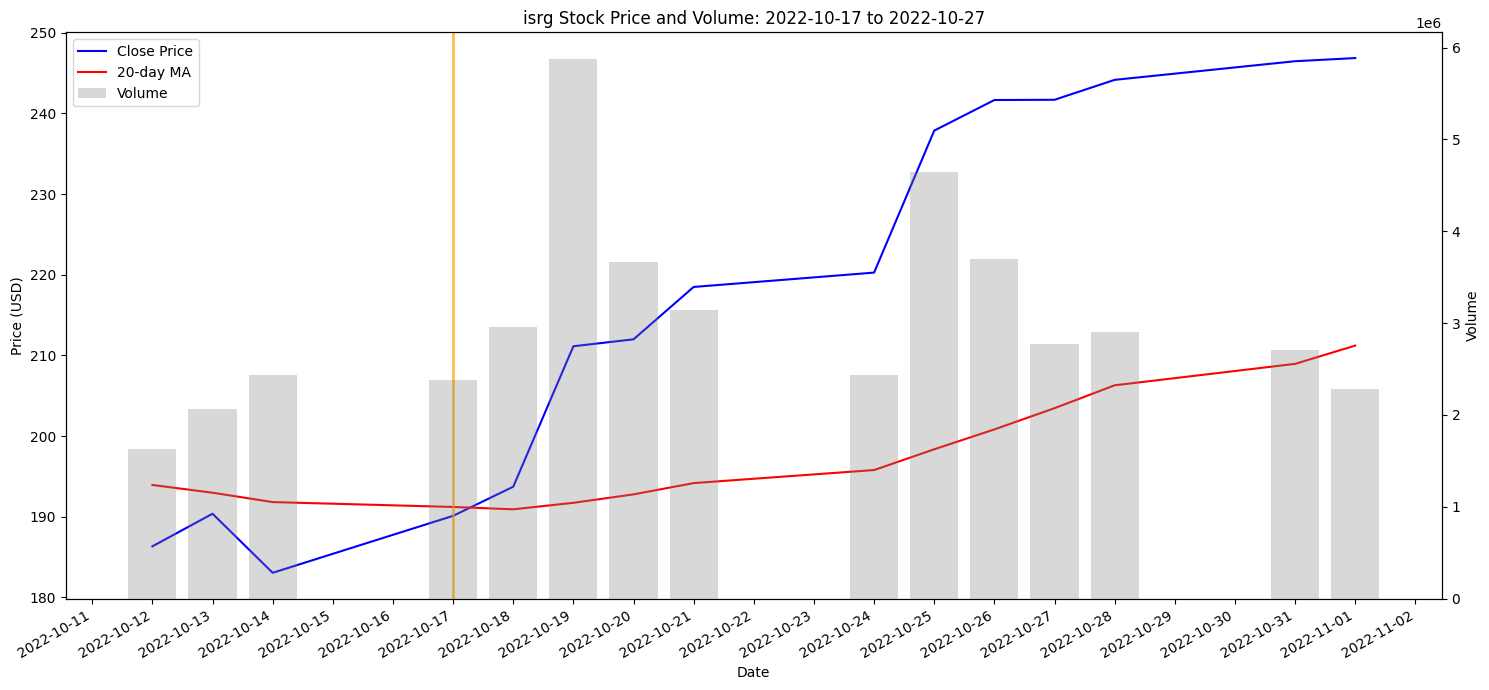

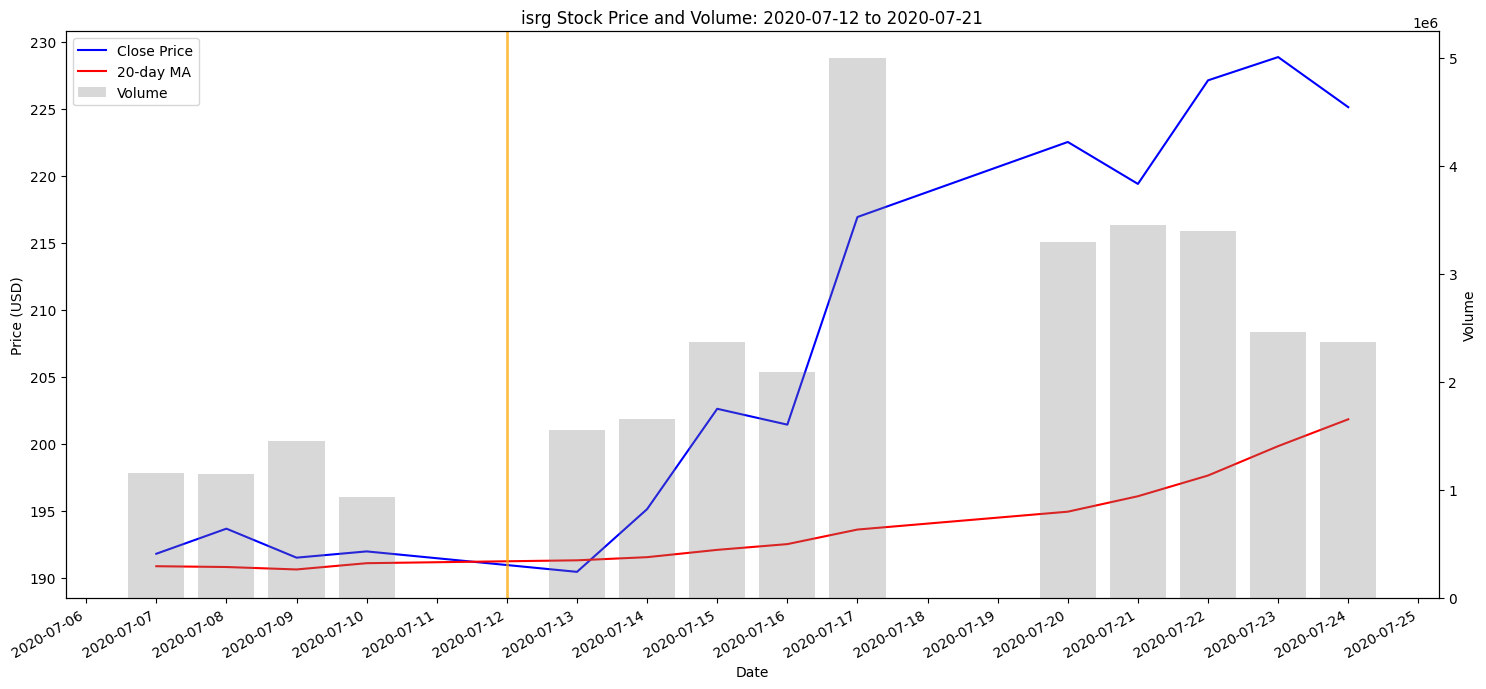

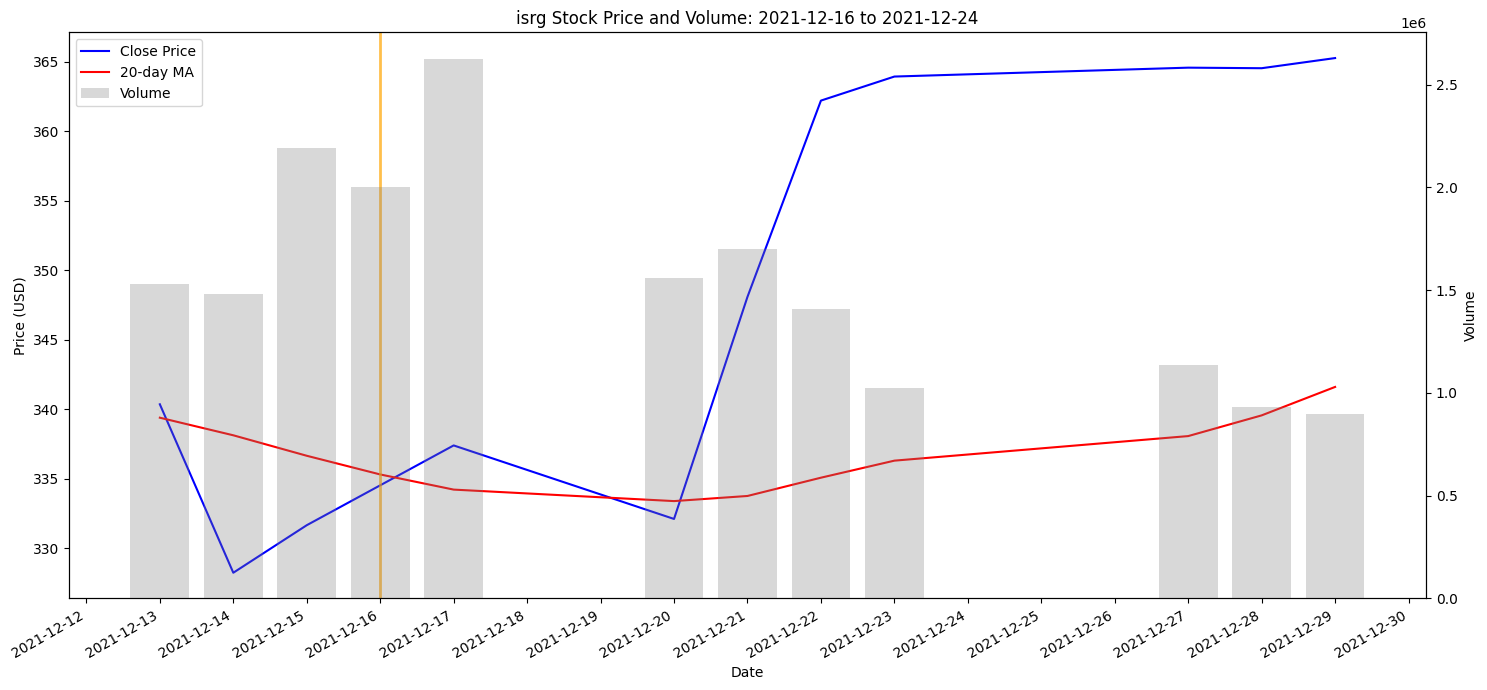

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Find the two periods with the highest sig_score
top_periods = final_data_df.nlargest(3, 'sig_score')[['Period', 'date_ls']]

# Print top periods to verify
print(top_periods)


isrg_data['Date'] = pd.to_datetime(isrg_data['Date'])
isrg_data['MA20'] = isrg_data['Close'].rolling(window=20).mean()

# 전체 그래프 생성
fig, ax1 = plt.subplots(figsize=(15, 7))

# 종가선과 20일 이동평균선 그리기
ax1.plot(isrg_data['Date'], isrg_data['Close'], label='Close Price', color='blue')
ax1.plot(isrg_data['Date'], isrg_data['MA20'], label='20-day MA', color='red')

# 첫 번째 y축 설정 (가격)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.tick_params(axis='y')

# 두 번째 y축 생성 (거래량)
ax2 = ax1.twinx()
ax2.bar(isrg_data['Date'], isrg_data['Volume'], label='Volume', alpha=0.3, color='gray')
ax2.set_ylabel('Volume')
ax2.tick_params(axis='y')

# x축 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# 범례 설정
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 그래프 제목 설정
plt.title('isrg Stock Price and Volume with Significant periods')

# x축 레이블 회전
plt.gcf().autofmt_xdate()

# top_periods 파스텔 색상으로 강조
for period in top_periods['date_ls']:
    start_date = pd.to_datetime(period[0])
    end_date = pd.to_datetime(period[-1])
    ax1.axvspan(start_date, end_date, color='yellow', alpha=0.3)

# 전체 그래프 표시
plt.tight_layout()
plt.show()

# 각 기간별 차트 생성
for idx, row in top_periods.iterrows():
    period = row['date_ls']
    first_date = pd.to_datetime(period[0])
    start_date = pd.to_datetime(period[0]) - pd.Timedelta(days=5)
    end_date = pd.to_datetime(period[-1]) + pd.Timedelta(days=5)
    
    # 해당 기간의 데이터 필터링
    mask = (isrg_data['Date'] >= start_date) & (isrg_data['Date'] <= end_date)
    period_data = isrg_data.loc[mask]
    
    # 그래프 생성
    fig, ax1 = plt.subplots(figsize=(15, 7))
    
    # 종가선과 20일 이동평균선 그리기
    ax1.plot(period_data['Date'], period_data['Close'], label='Close Price', color='blue')
    ax1.plot(period_data['Date'], period_data['MA20'], label='20-day MA', color='red')
    
    # 첫 번째 y축 설정 (가격)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price (USD)')
    ax1.tick_params(axis='y')
    
    # 두 번째 y축 생성 (거래량)
    ax2 = ax1.twinx()
    ax2.bar(period_data['Date'], period_data['Volume'], label='Volume', alpha=0.3, color='gray')
    ax2.set_ylabel('Volume')
    ax2.tick_params(axis='y')
    
    # x축 날짜 포맷 설정
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    
    # 범례 설정
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # 그래프 제목 설정
    plt.title(f'isrg Stock Price and Volume: {row["Period"]}')
    
    # 실제 시작일 강조
    ax1.axvline(x=first_date, color='orange', alpha=0.7, linewidth=2)
    
    # x축 레이블 회전
    plt.gcf().autofmt_xdate()
    
    # 그래프 표시
    plt.tight_layout()
    plt.show()


# 분석 데이터

### 키워드 - 워드클라우드_query

In [13]:
import mysql.connector
import pandas as pd


# MySQL 데이터베이스 연결 설정
conn = mysql.connector.connect(
    host="database-1.cvqcay0g4c1o.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="jook",
    password="*********",
    database="antking"
)

# # SQL 쿼리 작성
# query = """
# 			 SELECT a.id, a.search_platform, a.search_keyword, a.pub_date, a.title,
# 			 a.content, a.link, k.keyword_set, se.sentiment_from_ctext,
# 			 se.sentiment_from_keyword, se.match_status, st.closing_price,
# 			 st.volume, st.daily_change_rate
#        FROM article a, sentiment se, keyword k, stock_info st
#        WHERE a.id = se.article_id
#              AND a.id = k.article_id
#              AND a.search_keyword = st.ticker
#              AND a.pub_date = st.date;
#        """

# # 데이터 가져오기
# df = pd.read_sql(query, con=conn)

# top_periods의 date_ls 칼럼에서 date 값 추출
date_ls = top_periods['date_ls'].explode().dropna().unique().tolist()

# Convert date list to a string format for SQL query
date_ls_str = ', '.join(f"'{str(date)}'" for date in date_ls)

# query 정의
query = f"""
SELECT
    a.id, a.search_keyword, a.pub_date, a.title, a.content, a.link, k.keyword_set, se.sentiment_from_ctext, 
    se.sentiment_from_keyword, se.match_status, st.closing_price
FROM
    article a, sentiment se, keyword k, stock_info st
WHERE
    a.id = se.article_id
    AND a.id = k.article_id
    AND a.search_keyword = st.ticker
    AND st.ticker = 'isrg'
    AND st.date = a.pub_date
    AND a.pub_date IN ({date_ls_str});
"""

print(query)

# 데이터 가져오기
df = pd.read_sql(query, con=conn)

print(df)



SELECT
    a.id, a.search_keyword, a.pub_date, a.title, a.content, a.link, k.keyword_set, se.sentiment_from_ctext, 
    se.sentiment_from_keyword, se.match_status, st.closing_price
FROM
    article a, sentiment se, keyword k, stock_info st
WHERE
    a.id = se.article_id
    AND a.id = k.article_id
    AND a.search_keyword = st.ticker
    AND st.ticker = 'isrg'
    AND st.date = a.pub_date
    AND a.pub_date IN ('2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27', '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21', '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24');

      id search_keyword    pub_date  \
0   3950           ISRG  2020-07-15   
1   3952           ISRG  2020-07-17   
2   3951           ISRG  2020-07-17   
3   39

/tmp/ipykernel_9757/303438641.py:55: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=conn)


In [14]:
len(df)

18

#### 본문 내용을 통한 키워드 추출

[nltk_data] Downloading package punkt to /home/jook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


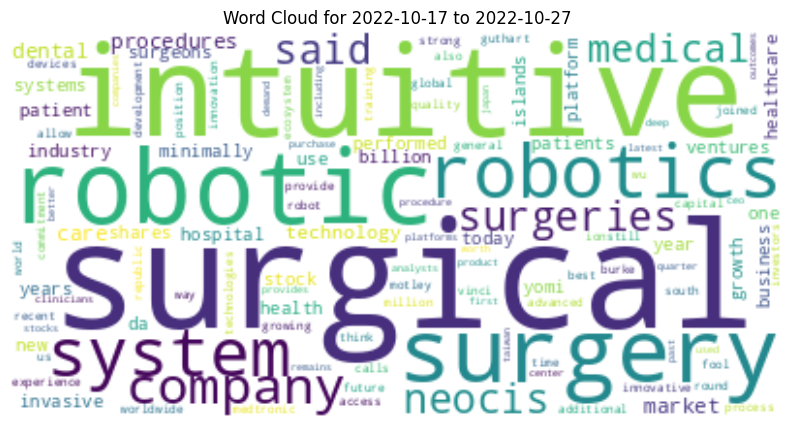

2022-10-17 to 2022-10-27.


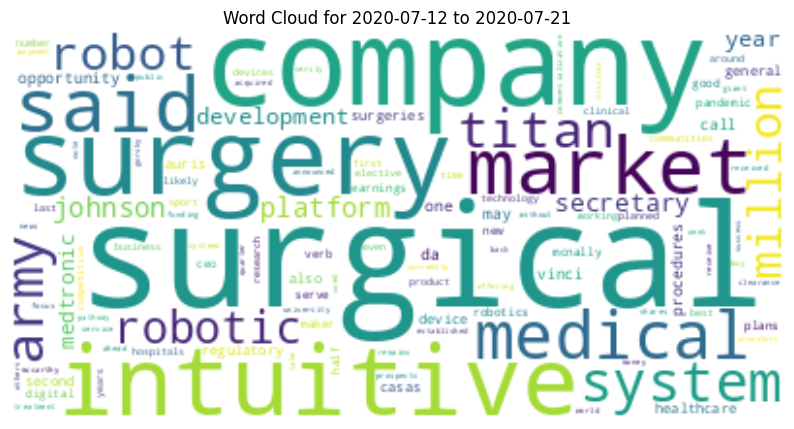

2020-07-12 to 2020-07-21.


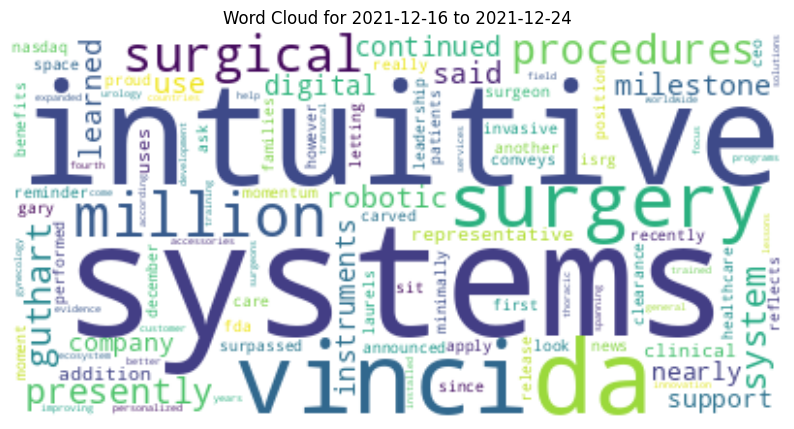

2021-12-16 to 2021-12-24.


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

# 텍스트 전처리 함수
def preprocess_text_nltk(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 1]
    return words

# 특정 기간의 데이터 필터링 (예: 2021년 1월 1일부터 2021년 12월 31일까지)
start_date = '2020-07-12'
end_date = '2022-10-27'

df['pub_date'] = pd.to_datetime(df['pub_date']).dt.strftime('%Y-%m-%d')


# nltk를 사용해 기간을 나눠 데이터프레임을 분리하는 함수
def get_keywords_by_period_nltk(df, period):
    all_keywords = []
    for content in df['content'].dropna():
        keywords = preprocess_text_nltk(content)
        all_keywords.extend(keywords)
    keyword_counts = Counter(all_keywords)
    return keyword_counts

# Get keywords for each period using nltk
period_keyword_counts_nltk = {}

# 특정 기간별 데이터프레임 생성
periods = {
    '2022-10-17 to 2022-10-27': ('2022-10-17', '2022-10-27'),
    '2020-07-12 to 2020-07-21': ('2020-07-12', '2020-07-21'),
    '2021-12-16 to 2021-12-24': ('2021-12-16', '2021-12-24')
    }


for period, (start_date, end_date) in periods.items():
    mask = (df['pub_date'] >= start_date) & (df['pub_date'] <= end_date)
    period_df = df.loc[mask]
    period_keyword_counts_nltk[period] = get_keywords_by_period_nltk(period_df, period)



# Generate word clouds and bar charts using nltk
for period, keyword_counts in period_keyword_counts_nltk.items():
    if keyword_counts:
        # Word Cloud
        wordcloud = WordCloud(background_color='white').generate_from_frequencies(keyword_counts)
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {period}')
        plt.show()

    #     # Bar Chart for Top 30 Keywords
    #     top_30_keywords = keyword_counts.most_common(30)
    #     if top_30_keywords:
    #         keywords, counts = zip(*top_30_keywords)
    #         plt.figure(figsize=(12, 8))
    #         plt.barh(keywords, counts, color='skyblue')
    #         plt.xlabel('Frequency')
    #         plt.title(f'Top 30 Keywords for {period}')
    #         plt.gca().invert_yaxis()
    #         plt.show()
    # else:
        print(f"{period}.")

### 거래량 KDE값으로 분석하기_query

In [16]:
import mysql.connector
import pandas as pd

# MySQL 데이터베이스 연결 설정
conn = mysql.connector.connect(
    host="database-1.cvqcay0g4c1o.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="jook",
    password="*********",
    database="antking"
)

# section_data의 Date 값을 불러오기
kde_section_date = flat_section_data['Date'].dropna().unique().tolist()

# Convert date list to a string format for SQL query
kde_section_date_str = ', '.join(f"'{date.strftime('%Y-%m-%d')}'" for date in kde_section_date)  # date를 문자열로 변환

# query 정의
query = f"""
SELECT
    a.id, a.search_keyword, a.pub_date, a.title, a.content, a.link, k.keyword_set, se.sentiment_from_ctext, 
    se.sentiment_from_keyword, se.match_status, st.closing_price
FROM
    article a, sentiment se, keyword k, stock_info st
WHERE
    a.id = se.article_id
    AND a.id = k.article_id
    AND a.search_keyword = st.ticker
    AND st.ticker = 'isrg'
    AND st.date = a.pub_date
    AND a.pub_date IN ({kde_section_date_str});
"""

print(query)

# 데이터 가져오기
kde_isrg_data_df = pd.read_sql(query, con=conn)

print(kde_isrg_data_df)

# 데이터베이스 연결 닫기
conn.close()

# title 중복 삭제하기
kde_isrg_data_df = kde_isrg_data_df.drop_duplicates(subset=['title'])

# 데이터프레임 내보내기
kde_isrg_data_df.to_csv("../sql/data/project_v1/isrg_kde_section_date_from_db.csv", index=False, encoding='utf-8')


SELECT
    a.id, a.search_keyword, a.pub_date, a.title, a.content, a.link, k.keyword_set, se.sentiment_from_ctext, 
    se.sentiment_from_keyword, se.match_status, st.closing_price
FROM
    article a, sentiment se, keyword k, stock_info st
WHERE
    a.id = se.article_id
    AND a.id = k.article_id
    AND a.search_keyword = st.ticker
    AND st.ticker = 'isrg'
    AND st.date = a.pub_date
    AND a.pub_date IN ('2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-2

/tmp/ipykernel_9757/1805610884.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  kde_isrg_data_df = pd.read_sql(query, con=conn)


       id search_keyword    pub_date  \
0    3887           ISRG  2020-03-02   
1    3888           ISRG  2020-03-03   
2    3889           ISRG  2020-03-04   
3    3890           ISRG  2020-03-06   
4    3892           ISRG  2020-03-10   
..    ...            ...         ...   
552  4748           ISRG  2023-10-23   
553  4747           ISRG  2023-10-23   
554  4955           ISRG  2024-03-06   
555  4954           ISRG  2024-03-06   
556  4953           ISRG  2024-03-06   

                                                 title  \
0                 Is Apple A Buy After Its 17% Plunge?   
1    Surgical robots: the value proposition and top...   
2    Surgery and AI give amputees more precise cont...   
3    Study: Robotic Whipple Has Advantages Over Ope...   
4    Resident physician at Marshall takes gold at r...   
..                                                 ...   
552  Unveiling Intuitive Surgical's True Worth: A C...   
553  Intuitive Surgical (NASDAQ:ISRG) shareholders ... 

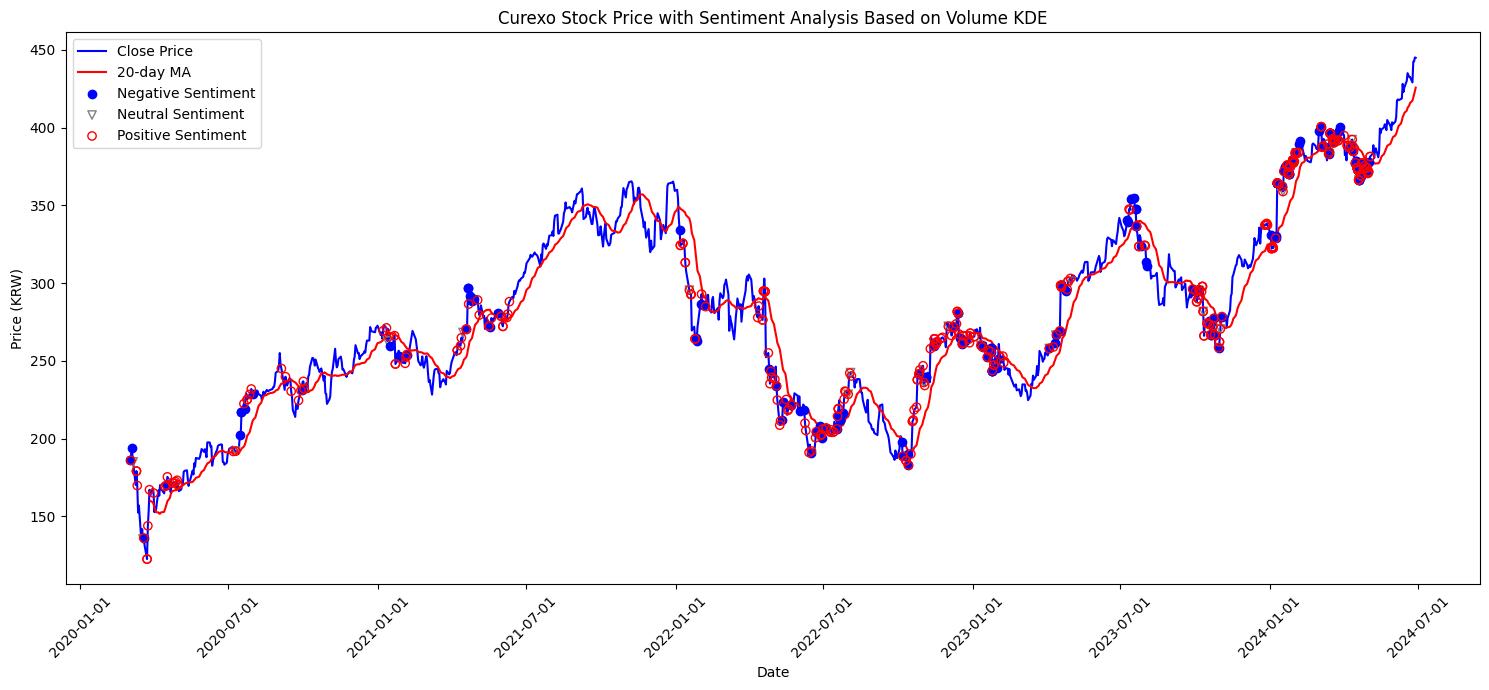

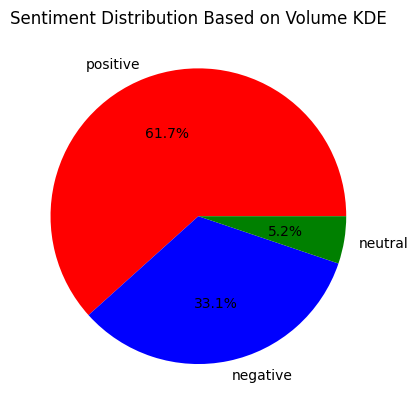

In [17]:

# 'pub_date'를 datetime 형식으로 변환
kde_isrg_data_df['pub_date'] = pd.to_datetime(kde_isrg_data_df['pub_date'])

# isrg_data 구간 가져오기
sections = isrg_data[['Date', 'Close', 'MA20']].copy()

# 해당 날짜에 대한 감정 데이터 병합
sections = sections.merge(kde_isrg_data_df[['pub_date', 'sentiment_from_ctext']], left_on='Date', right_on='pub_date', how='left')

# 긍정적, 부정적, 중립적 감정 구분
positive_sentiment = sections[sections['sentiment_from_ctext'] == 'positive']
negative_sentiment = sections[sections['sentiment_from_ctext'] == 'negative']
neutral_sentiment = sections[sections['sentiment_from_ctext'] == 'neutral']

# 차트 생성 및 표시
fig, ax = plt.subplots(figsize=(15, 7))

# 종가 및 20일 이동 평균선 그리기
ax.plot(sections['Date'], sections['Close'], label='Close Price', color='blue')
ax.plot(sections['Date'], sections['MA20'], label='20-day MA', color='red')

# 부정적 감정 점 표시
ax.scatter(negative_sentiment['Date'], negative_sentiment['Close'], color='blue', label='Negative Sentiment', zorder=5)

# 중립적 감정 점 표시
ax.scatter(neutral_sentiment['Date'], neutral_sentiment['Close'], edgecolor='gray', facecolor='none', marker='v', label='Neutral Sentiment', zorder=4)

# 긍정적 감정 점 표시
ax.scatter(positive_sentiment['Date'], positive_sentiment['Close'], edgecolor='red', facecolor='none', label='Positive Sentiment', zorder=5)



# 라벨 및 제목 설정
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.set_title('isrg Stock Price with Sentiment Analysis Based on Volume KDE')

# x축 날짜 포맷 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# 범례 추가
ax.legend()

# 차트 표시
plt.tight_layout()
plt.show()

#감정 분포 파이 차트 생성
sentiment_counts = kde_isrg_data_df['sentiment_from_ctext'].value_counts()
colors = {'positive': 'red', 'negative': 'blue', 'neutral': 'green'}
fig, ax = plt.subplots()
ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=[colors[key] for key in sentiment_counts.index])
ax.set_title('Sentiment Distribution Based on Volume KDE')
plt.show()


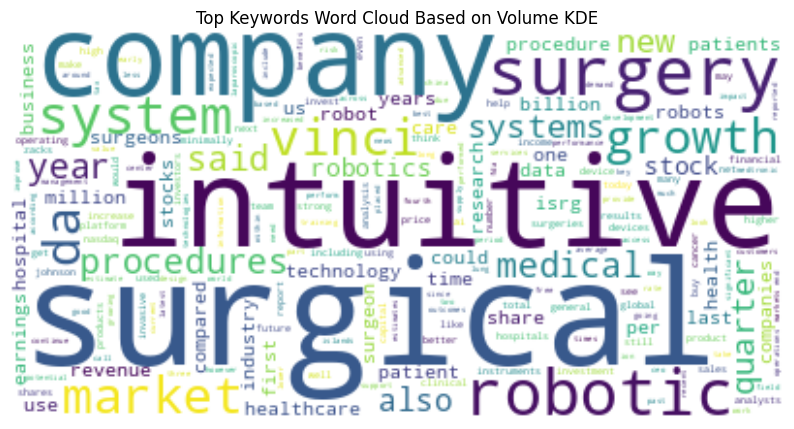

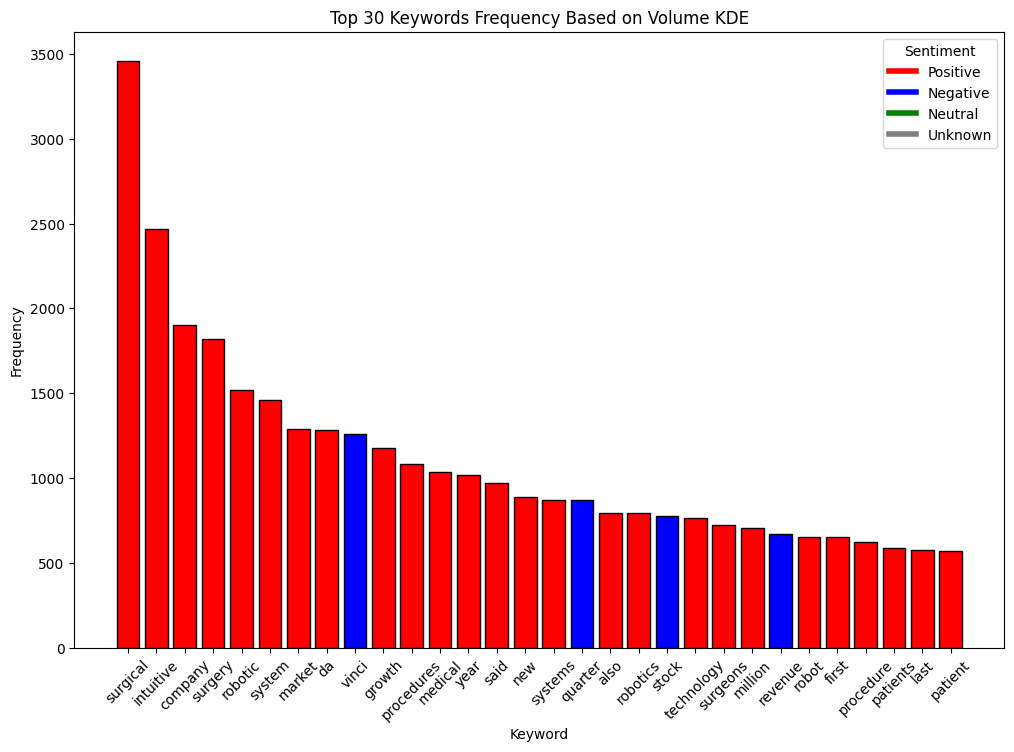

In [18]:
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd


# 'pub_date'를 datetime 형식으로 변환
kde_isrg_data_df['pub_date'] = pd.to_datetime(kde_isrg_data_df['pub_date']).dt.strftime('%Y-%m-%d')

# NLTK를 사용한 텍스트 전처리 함수
def preprocess_text_nltk(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 1]
    return words

# 텍스트 데이터에서 키워드 추출
all_keywords = []
for content in kde_isrg_data_df['content'].dropna():
    keywords = preprocess_text_nltk(content)
    all_keywords.extend(keywords)

# 키워드 빈도 계산
keyword_counts = Counter(all_keywords)

# 상위 30개 키워드 추출
top_keywords = keyword_counts.most_common(30)

# DataFrame으로 변환
top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])

# 감정 분석 함수
def keyword_sentiment(keyword, kde_isrg_data_df):
    sentiments = kde_isrg_data_df[kde_isrg_data_df['content'].str.contains(keyword, na=False)]['sentiment_from_ctext']
    if sentiments.empty:
        return 'Unknown'
    return sentiments.mode()[0]

# 각 키워드의 감정 분석 결과 추가
top_keywords_df['Sentiment'] = top_keywords_df['Keyword'].apply(lambda x: keyword_sentiment(x, kde_isrg_data_df))

# 감정에 따른 색상 정의
def get_keyword_color(sentiment):
    if sentiment == 'positive':
        return 'red'
    elif sentiment == 'negative':
        return 'blue'
    elif sentiment == 'neutral':
        return 'green'
    else:
        return 'gray'

# 색상 적용
top_keywords_df['Color'] = top_keywords_df['Sentiment'].apply(get_keyword_color)

# 키워드 시각화 (WordCloud)
wordcloud = WordCloud(background_color='white').generate_from_frequencies(keyword_counts)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords Word Cloud Based on Volume KDE')
plt.show()

# 키워드 시각화 (막대그래프)
plt.figure(figsize=(12, 8))
bars = plt.bar(top_keywords_df['Keyword'], top_keywords_df['Frequency'], color=top_keywords_df['Color'], edgecolor='black')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Top 30 Keywords Frequency Based on Volume KDE')
plt.xticks(rotation=45)

# 범례 추가
legend_elements = [
    plt.Line2D([0], [0], color='red', lw=4, label='Positive'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Negative'),
    plt.Line2D([0], [0], color='green', lw=4, label='Neutral'),
    plt.Line2D([0], [0], color='gray', lw=4, label='Unknown')
]
plt.legend(handles=legend_elements, title='Sentiment')

plt.show()

### 벨류에이션으로 기간 비교 (P/E)

In [13]:
import requests

api_key = '****'
symbol = 'ISRG'
url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={symbol}&apikey={api_key}'

response = requests.get(url)
data = response.json()

# EPS 데이터 추출 및 출력
if 'quarterlyEarnings' in data:
    eps_data = data['quarterlyEarnings']
    for quarter_data in eps_data:
        print(f"Quarter Ended: {quarter_data['fiscalDateEnding']}, EPS: {quarter_data['reportedEPS']}")
else:
    print("Quarterly EPS data not found")

Quarter Ended: 2024-03-31, EPS: 1.5
Quarter Ended: 2023-12-31, EPS: 1.6
Quarter Ended: 2023-09-30, EPS: 1.46
Quarter Ended: 2023-06-30, EPS: 1.42
Quarter Ended: 2023-03-31, EPS: 1.23
Quarter Ended: 2022-12-31, EPS: 1.23
Quarter Ended: 2022-09-30, EPS: 1.19
Quarter Ended: 2022-06-30, EPS: 1.14
Quarter Ended: 2022-03-31, EPS: 1.13
Quarter Ended: 2021-12-31, EPS: 1.3
Quarter Ended: 2021-09-30, EPS: 1.19
Quarter Ended: 2021-06-30, EPS: 1.31
Quarter Ended: 2021-03-31, EPS: 1.17
Quarter Ended: 2020-12-31, EPS: 1.19
Quarter Ended: 2020-09-30, EPS: 0.92
Quarter Ended: 2020-06-30, EPS: 0.37
Quarter Ended: 2020-03-31, EPS: 0.9
Quarter Ended: 2019-12-31, EPS: 1.16
Quarter Ended: 2019-09-30, EPS: 1.14
Quarter Ended: 2019-06-30, EPS: 1.08
Quarter Ended: 2019-03-31, EPS: 0.87
Quarter Ended: 2018-12-31, EPS: 1.04
Quarter Ended: 2018-09-30, EPS: 0.94
Quarter Ended: 2018-06-30, EPS: 0.92
Quarter Ended: 2018-03-31, EPS: 0.81
Quarter Ended: 2017-12-31, EPS: 0.85
Quarter Ended: 2017-09-30, EPS: 0.92
Quart

In [16]:
import pandas as pd
import plotly.graph_objects as go
from datetime import timedelta

# JSON 데이터에서 quarterlyEarnings 부분만 추출
quarterly_earnings = data['quarterlyEarnings']

# 데이터프레임으로 변환
df = pd.DataFrame(quarterly_earnings)

# 'fiscalDateEnding'를 datetime 형식으로 변환
df['fiscalDateEnding'] = pd.to_datetime(df['fiscalDateEnding'])

# 'reportedEPS'를 float 형식으로 변환
df['reportedEPS'] = pd.to_numeric(df['reportedEPS'], errors='coerce')

# 지난 5년간의 EPS 데이터 필터링
last_5_years = df[df['fiscalDateEnding'] >= pd.to_datetime('2019-01-01')]

# 날짜순으로 정렬
last_5_years = last_5_years.sort_values('fiscalDateEnding')

# 히스토리컬 데이터 
isrg_data = pd.read_csv('../sql/data/project_v1/isrg_historical_data_20200301-0630.csv')
isrg_data['Date'] = pd.to_datetime(isrg_data['Date'])
isrg_data = isrg_data.sort_values('Date')

# EPS와 가장 가까운 날짜의 주가 데이터 매칭
merged_rows = []
for _, row in last_5_years.iterrows():
    date = row['fiscalDateEnding']
    closest_price_row = isrg_data.loc[(isrg_data['Date'] - date).abs().idxmin()]
    merged_row = pd.concat([row, closest_price_row])
    merged_rows.append(merged_row)

merged_df = pd.DataFrame(merged_rows)

# P/E 비율 계산
merged_df['P/E Ratio'] = merged_df['Close'] / merged_df['reportedEPS']
merged_df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
merged_df.dropna(subset=['P/E Ratio'], inplace=True)

# 평균 P/E 비율 계산
average_pe = merged_df['P/E Ratio'].mean()

# P/E 비율 차트 생성
fig = go.Figure()

fig.add_trace(go.Scatter(x=merged_df['fiscalDateEnding'], y=merged_df['P/E Ratio'], mode='lines+markers', name='P/E Ratio'))
fig.add_trace(go.Scatter(x=merged_df['fiscalDateEnding'], y=[average_pe]*len(merged_df), mode='lines', name='Average P/E Ratio', line=dict(dash='dash')))

# 레이아웃 설정
fig.update_layout(
    title='ISRG 벨류에이션 차트',
    xaxis_title='Date',
    yaxis_title='P/E Ratio',
    template='plotly_white'
)

fig.show()

print(f"평균 P/E 비율: {average_pe:.2f}")

평균 P/E 비율: 230.11
